**DSEM ASSIGNMENT 5**</br>
**Rhea Bajpai** <br>
NUID: **002727492**

## Type Classification | TMNIST

# The objective of this notebook is to perform character recognition on the TMINST (94 character) dataset using a straightforward CNN network.

Convolutional Neural Networks (CNNs) are a class of neural networks commonly used for image processing tasks, known for their effectiveness with large image datasets. CNNs typically comprise convolutional layers followed by fully connected layers, along with pooling layers and associated weights. This unique architecture allows CNNs to leverage the inherent two-dimensional structure of input data, resulting in fewer parameters to consider compared to other deep neural networks.

### Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
!pip install gdown
import gdown
epochs = 10

### Read the dataset: TMNIST Alphabet (94 characters)

In [2]:
# Define the Google Drive link
link = 'https://drive.google.com/file/d/1XuWWyQfOFp_r2fLCpsoMSlv75WaLTG6H/view?usp=share_link' 

# Download the file from the link using gdown
file_id = link.split('/')[-2]
url = f'https://drive.google.com/uc?id={file_id}'
output = 'tmnist.csv'

gdown.download(url, output, quiet=False)

# Read the downloaded file using pandas
df = pd.read_csv(output)

df.head()

Downloading...
From (uriginal): https://drive.google.com/uc?id=1XuWWyQfOFp_r2fLCpsoMSlv75WaLTG6H
From (redirected): https://drive.google.com/uc?id=1XuWWyQfOFp_r2fLCpsoMSlv75WaLTG6H&confirm=t&uuid=f4e53f3a-cbdf-4e46-82f2-21545c731ba2
To: /kaggle/working/tmnist.csv
100%|██████████| 941M/941M [00:04<00:00, 229MB/s] 


,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,Salsa-Regular,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MouseMemoirs-Regular,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Creepster-Regular,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SeoulNamsan-Light,/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HachiMaruPop-Regular,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
print("94 characters")
print(df['labels'].unique())

94 characters
['6' 'D' 'f' '/' 'F' 'x' 'J' '8' 'H' 'k' '@' '1' '=' 'g' ')' '2' 'd' '^'
 '3' 't' '#' '.' '4' 'o' '"' 'y' 'A' 'u' 'G' '-' 'm' 'W' '&' 'c' '9' 'N'
 ']' 'P' 'X' '|' '}' 'h' '7' 'j' '5' '>' '?' 'b' '*' 'w' 'l' '0' '$' 'I'
 'Y' '%' ':' 'T' 'K' 'E' '<' 'V' '{' 'M' 'S' 'a' 'i' 'r' "'" 'p' ';' '['
 '+' 'e' 'U' '(' 's' '~' ',' 'C' 'q' '_' 'n' 'B' 'z' 'v' 'O' 'R' '`' 'Z'
 'Q' 'L' '!' '\\']


In [4]:
X=df.drop(['names','labels'],axis=1)#input
y=df['labels']#output

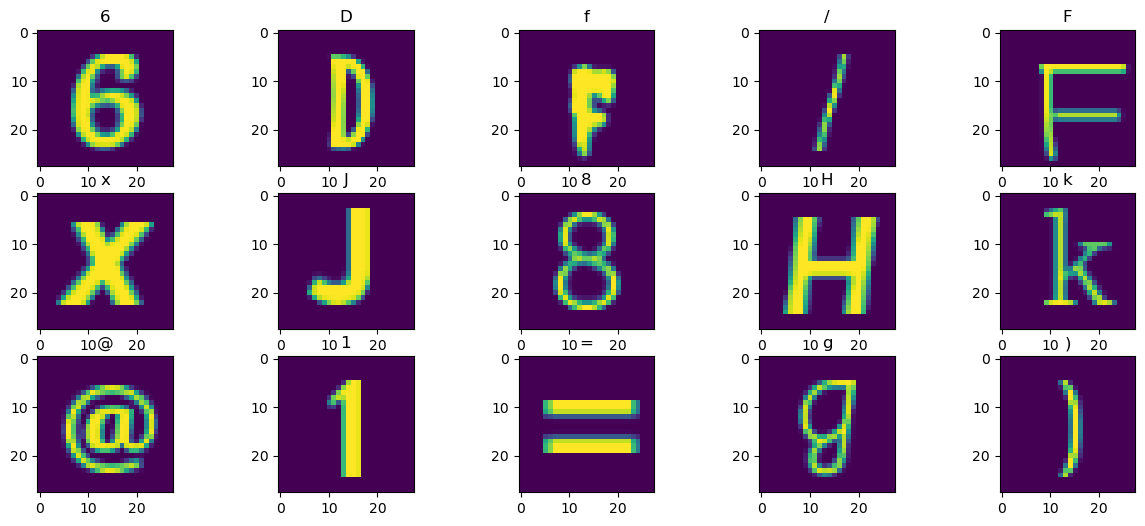

In [5]:
#removing unneccesary columns
y=df['labels']
x=df.drop(['names','labels'],axis=1)
#plotting some of the values and corresponding labels as title
plt.figure(figsize=(15, 6))
for i in range(15):  
  plt.subplot(3,5,i+1)
  plt.title(y.iloc[i])
  plt.imshow(X.values[i].reshape(28,28), cmap=plt.get_cmap('viridis'))
plt.show()

### Splitting dataset into training and test sets.
Split the data set into two parts, 75% is the training set and 25% is the test set.

In [6]:
# splits the data into training and testing sets, maintains class distribution, and calculates the number of unique classes and names in the DataFrame.  
xtrain, xtest, ytrain, ytest = train_test_split( x, y, test_size=0.25, random_state=42,stratify=y)
classes=df['labels'].nunique()
font=df['names'].nunique()

###Data Preparation
The pixel values, originally ranging from 0 to 255, are scaled down to a range of 0 to 1 in neural network models

In [7]:
xtrain= (xtrain.astype('float32'))/255.0
xtest = (xtest.astype('float32'))/255.0

#### Using the one hot encoder to encoding the y values.  
One hot encoding is a critical step in improving prediction and classification accuracy of machine and deep learning models, as it involves transforming categorical data variables into a format that can be effectively used by these algorithms.

In [8]:
encoder = OneHotEncoder(sparse=False,handle_unknown='ignore')
ytrainEncoded=encoder.fit_transform(ytrain.values.reshape(-1,1))
ytestEncoded=  encoder  .transform(ytest.values.reshape(-1,1))

### Reshaping the input data
Why is it necessary?
</br>Although we can train a model to recognize pictures. There is a severe limitation on the size of the input image. The majority of convolutional neural networks are made to only accept images that are a specific size. This poses a number of difficulties for the deployment of models and the collection of data. Reshaping the input images to make them suitable for feeding into the networks is a common practice to get around this restriction.

In [9]:
xtrainNorm=xtrain.values.reshape(xtrain.shape[0],28,28, 1)
xtestNorm=xtest.values.reshape(xtest.shape[0],28,28, 1)

## Connected Neural Network
<img src="https://github.com/Rhea3110/DSEM/blob/main/CNN2.jpeg?raw=true" >

## Convolutional Neural Networks (CNNs) 
Convolutional Layers: CNNs use convolutional layers to apply filters or kernels to input data, extracting local features like edges and textures.

Pooling Layers: Pooling layers downsample feature maps, reducing spatial dimensions while retaining important features.

Activation Functions: Activation functions introduce non-linearity into the network, allowing it to learn complex relationships between input data and output predictions.

Fully Connected Layers: Fully connected layers generate final output predictions, and may contain hidden layers for feature representation.

Backpropagation: CNNs are trained using labeled data and backpropagation algorithm to optimize model parameters.

## Application Points:

Image Recognition: CNNs are widely used for tasks like image classification, object detection, and facial recognition.

Computer Vision: CNNs can be applied to tasks like image segmentation, scene understanding, and video analysis.

Medical Imaging: CNNs are used for tasks like medical image analysis, disease diagnosis, and drug discovery.

Autonomous Vehicles: CNNs can enable object detection, lane detection, and traffic sign recognition in self-driving cars.

Natural Language Processing: CNNs can be used for tasks like text classification, sentiment analysis, and speech recognition.

Gaming: CNNs can be used for tasks like game character recognition, motion capture, and game control.

Agriculture: CNNs can assist in plant disease detection, crop yield prediction, and pest identification in agriculture.

Manufacturing: CNNs can be used for quality control, defect detection, and product inspection in manufacturing processes.

Security: CNNs can be applied to tasks like video surveillance, anomaly detection, and facial recognition for security purposes.

Finance: CNNs can be used for stock market prediction, fraud detection, and risk assessment in financial applications.

Overall, CNNs have wide-ranging applications in various domains and continue to be a powerful tool in deep learning for processing grid-like data.

### The main layers in a Convolutional Neural Network (CNN) are:

Convolutional Layers: Apply filters to input data to extract local features.
Pooling Layers: Downsample feature maps to reduce spatial dimensions.
Activation Functions: Introduce non-linearity to learn complex relationships.
Fully Connected Layers: Generate final output predictions.
Optional Layers: Dropout, Batch Normalization, etc., for regularization and normalization.
Output Layer: Produces the final output predictions based on the task (e.g., classification, regression).
These layers work together to process input data, extract features, and generate output predictions in a CNN.

## Convolution Neural Network Layers

Three main layers of CNN are

## Convolutional Layer

A convolutional layer is a key component in a Convolutional Neural Network (CNN) that performs the convolution operation on input data. It is responsible for extracting local features from the input data, such as images, through a series of filters or kernels.

The convolution operation involves taking a small window or filter, typically 3x3 or 5x5 in size, and sliding it over the input data. At each location, the filter performs element-wise multiplication with the corresponding portion of the input data, and the results are summed to obtain a single value. This process is repeated across the entire input data, producing a feature map that represents the activation of the filter at different spatial locations.

Convolutional layers also incorporate activation functions, such as ReLU (Rectified Linear Unit), to introduce non-linearity into the network, allowing it to learn complex patterns and representations from the input data. Additionally, multiple filters are used in each convolutional layer to learn different features or patterns from the input data.

The output of a convolutional layer is typically passed through additional layers, such as pooling layers and fully connected layers, to further process and extract high-level features from the input data for tasks such as image recognition, object detection, and image generation. Convolutional layers are critical for capturing local patterns, such as edges, textures, and shapes, in the input data and are a fundamental building block of CNNs.

<img src="https://github.com/Rhea3110/DSEM/blob/main/convolution.jpeg?raw=true" />

## Pooling Layers

<b>A pooling layer</B> in a Convolutional Neural Network (CNN) is a type of layer that downsamples the feature maps obtained from the convolutional layers. The main purpose of pooling is to reduce the spatial dimensions of the feature maps while retaining important features.

There are several types of pooling operations commonly used in CNNs, including:

Max Pooling: Selects the maximum value from a local region (usually a small window) of the feature map. It helps to capture the most salient feature in that region and is widely used in CNNs.

Average Pooling: Calculates the average value from a local region of the feature map. It can help in reducing noise and is useful in some scenarios where capturing average values is important.

Global Average Pooling: Calculates the average value across the entire feature map, reducing the spatial dimensions to 1x1. It is commonly used in the last pooling layer before the fully connected layers to reduce the spatial dimensions to a single vector.

Pooling layers help in reducing the computational complexity of the network, making it more efficient, and also aid in generalization by reducing overfitting. However, pooling also leads to some loss of spatial information, as it downsamples the feature maps. Therefore, the choice of pooling operation and its parameters (such as window size and stride) should be carefully considered based on the task and dataset being used.

<img src="https://github.com/Rhea3110/DSEM/blob/main/maxpooling.jpeg?raw=true" />

## Fully Connected Layer

A<b> fully connected layer</b>, also known as a dense layer or a fully connected neural network (FCNN) layer, is a type of layer that connects each neuron to every neuron in the previous layer, forming a fully connected graph. Each connection is associated with a weight, and each neuron also has its own bias. The outputs from the neurons in the previous layer are multiplied by the weights, summed with the biases, and passed through an activation function to produce the output of the fully connected layer.

The purpose of the fully connected layer is to capture global patterns and relationships between features learned from previous layers. It learns to combine and transform features into higher-level representations that can be used for making final predictions. Fully connected layers are typically used for tasks such as classification, regression, and sequence generation, where the network needs to make decisions or generate outputs based on the learned features.

Fully connected layers are usually placed after the convolutional and pooling layers in a CNN, and are followed by an output layer that produces the final predictions based on the output of the fully connected layer. The number of neurons in the fully connected layer and the activation function used can be tailored to the specific task and dataset being used, and they play an important role in the overall performance of the CNN.





<img src="https://github.com/Rhea3110/DSEM/blob/main/FC.jpeg?raw=true" />

## CNN Design Rules

Input Layer: Input images are typically square, such as 28x28x3 or 64x64x3, to simplify design and speed up matrix calculations.

Input Size: Input size should be divisible by at least 4, which allows for downsampling during the convolutional layers.

Filter Size: Filters (also known as kernels) are typically small, either 3x3 or 5x5, and are used for feature extraction.

Stride: Stride determines the step size for moving the filter across the input image, and is typically set to 1 or 2, depending on the size of the input.

Zero Padding: Zero padding is commonly used to ensure that the output of the convolutional layer has the same size as the input, helping to preserve spatial dimensions.

Pooling: Pooling layers typically use a 2x2 kernel size to downsample the feature maps and reduce spatial dimensions.

Dropout: Dropout is a technique used to prevent overfitting in CNNs by randomly setting a fraction of the input units to 0 during training, which helps to improve model generalization.

By following these design rules, you can create a well-structured CNN architecture that effectively captures features from input images and provides good performance on your specific task and dataset. Remember to experiment and fine-tune these parameters based on your specific requirements and available computational resources.

In [10]:
mdl = Sequential() # Create a sequential deep learning model

mdl.add(Conv2D(64, (5, 5), activation='relu', input_shape=(28, 28,1)))
mdl.add(MaxPooling2D((2, 2)))
## Flatten the output from previous layers
mdl.add(Flatten())
mdl.add(Dense(128, activation='relu'))
mdl.add(Dense(64, activation='relu'))
mdl.add(Dense(32, activation='relu'))
mdl.add(Dense(32, activation='relu'))
mdl.add(Dense(classes, activation='softmax'))
#Adam optimizer for model training
opt = Adam()
mdl.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
mdl.summary() #display summary

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                        

## What is Relu?
ReLU (Rectified Linear Unit) is an activation function commonly used in neural networks. It is defined mathematically as:

f(x) = max(0, x)

where x is the input to the ReLU function, and f(x) is the output. In other words, if the input x is positive, the ReLU function returns the same value as the input (i.e., f(x) = x), and if the input x is negative, the ReLU function returns 0.

The ReLU function introduces non-linearity to the neural network, allowing it to learn complex and nonlinear patterns in the data. It is a popular choice for an activation function due to its simplicity and ability to mitigate the vanishing gradient problem, which can occur during training when gradients become too small and hinder the learning process.

The derivative of the ReLU function can be calculated as:

f'(x) = 1, if x > 0
f'(x) = 0, if x <= 0

In other words, the derivative of ReLU is 1 for positive inputs (x > 0) and 0 for negative inputs (x <= 0). This makes the ReLU function computationally efficient during both forward and backward propagation in neural network training.

Overall, ReLU is a widely used activation function in deep learning due to its simplicity, ability to mitigate the vanishing gradient problem, and computational efficiency during training.

<img src="https://github.com/Rhea3110/DSEM/blob/main/relu.jpeg?raw=true" />

## Optimizers in neural network

Optimizers are critical components of neural networks, as they play a vital role in updating the model's parameters during training to minimize the loss or error between predicted and actual outputs. There are various optimizers used in neural networks, including Gradient Descent, Stochastic Gradient Descent (SGD), Mini-batch Gradient Descent, Adam, RMSprop, and Adagrad, among others.

Gradient Descent is a basic optimization algorithm that updates parameters in the direction of the negative gradient of the loss function with a fixed learning rate. SGD, on the other hand, randomly selects a mini-batch of training examples at each iteration and updates the parameters, introducing randomness and faster convergence. Adam is an adaptive learning rate optimizer that combines the benefits of both Momentum and RMSprop, adjusting the learning rate based on the past gradients and squared gradients of parameters. RMSprop and Adagrad are also adaptive learning rate optimizers that adjust the learning rate based on historical gradients. The choice of optimizer depends on the problem, network architecture, and dataset, and it is often a hyperparameter that needs to be tuned to achieve optimal training performance.


## Adam

Adam (Adaptive Moment Estimation) is a popular optimization algorithm used in deep neural networks. It combines the concepts of momentum and adaptive learning rates to efficiently update the model's parameters during training.

In Adam, two exponentially decaying averages are maintained for the first-order moment (mean of gradients) and the second-order moment (variance of gradients) of the parameters. These moments are updated at each iteration using hyperparameters β1 and β2, which control the decay rates. The algorithm also incorporates bias correction terms to account for the initial bias of the moments.

During parameter updates, Adam calculates the effective step size (learning rate) for each parameter by normalizing the first-order moment with β1 and the second-order moment with β2. The updated parameters are then calculated by subtracting this normalized step size from the current parameters. The adaptive learning rate in Adam allows for faster convergence in regions with steep gradients and smaller updates in regions with flatter gradients, making it effective for a wide range of optimization problems in deep learning.

The Adam optimizer is characterized by the following update equations for each parameter in the neural network:
* Compute the gradient of the parameter with respect to the loss.
* Update the first moment (mean) of the gradient: m = β1 * m + (1 - β1) * gradient
* Update the second moment (variance) of the gradient: v = β2 * v + (1 - β2) * (gradient^2)
* Bias-correct the first and second moments: m_hat = m / (1 - β1^t), v_hat = v / (1 - β2^t) where t is the current iteration.
* Update the parameter: parameter = parameter - α * m_hat / (sqrt(v_hat) + ε)

## Training


Hyperparameters like batch size and epochs are important settings in machine and deep learning algorithms that significantly impact the training process and model performance.

Batch size refers to the number of data samples that are processed in each iteration during training. It affects the speed of training and the amount of memory required. A larger batch size can speed up training but may require more memory, while a smaller batch size may require less memory but can slow down training.

Epochs refer to the number of times the entire dataset is passed through the algorithm during training. It is a hyperparameter that determines how many times the model will iterate over the entire dataset. Too few epochs may result in underfitting, where the model does not learn the underlying patterns in the data, while too many epochs may result in overfitting, where the model becomes too specialized to the training data and may not generalize well to new data.

Finding the optimal values for batch size and epochs is an important part of hyperparameter tuning, as it can significantly impact the performance and convergence of a machine or deep learning model. Experimenting with different values for these hyperparameters can help fine-tune the model and achieve better accuracy and performance.

In [11]:
# Model fitting 
modelHistory=mdl.fit(xtrainNorm, ytrainEncoded, epochs=epochs, validation_data=(xtestNorm, ytestEncoded), verbose=2, batch_size=128)

Epoch 1/10
1607/1607 - 97s - loss: 0.8152 - accuracy: 0.7806 - val_loss: 0.4208 - val_accuracy: 0.8736 - 97s/epoch - 60ms/step
Epoch 2/10
1607/1607 - 93s - loss: 0.3636 - accuracy: 0.8888 - val_loss: 0.3362 - val_accuracy: 0.8973 - 93s/epoch - 58ms/step
Epoch 3/10
1607/1607 - 93s - loss: 0.2818 - accuracy: 0.9126 - val_loss: 0.3173 - val_accuracy: 0.8984 - 93s/epoch - 58ms/step
Epoch 4/10
1607/1607 - 93s - loss: 0.2420 - accuracy: 0.9238 - val_loss: 0.2593 - val_accuracy: 0.9201 - 93s/epoch - 58ms/step
Epoch 5/10
1607/1607 - 90s - loss: 0.2156 - accuracy: 0.9303 - val_loss: 0.2523 - val_accuracy: 0.9254 - 90s/epoch - 56ms/step
Epoch 6/10
1607/1607 - 95s - loss: 0.1936 - accuracy: 0.9361 - val_loss: 0.2427 - val_accuracy: 0.9277 - 95s/epoch - 59ms/step
Epoch 7/10
1607/1607 - 92s - loss: 0.1752 - accuracy: 0.9411 - val_loss: 0.2317 - val_accuracy: 0.9298 - 92s/epoch - 57ms/step
Epoch 8/10
1607/1607 - 91s - loss: 0.1615 - accuracy: 0.9449 - val_loss: 0.2441 - val_accuracy: 0.9280 - 91s/ep

### Testing
Let's now evaluate the performance of our model and examine its test accuracy.

In [12]:
#Accuracy
testLoss, testAccuracy = mdl.evaluate(xtestNorm, ytestEncoded)
print("Test Accuracy: {}".format(testAccuracy))

2142/2142 [==============================] - 11s 5ms/step - loss: 0.2567 - accuracy: 0.9272
Test Accuracy: 0.9271934032440186


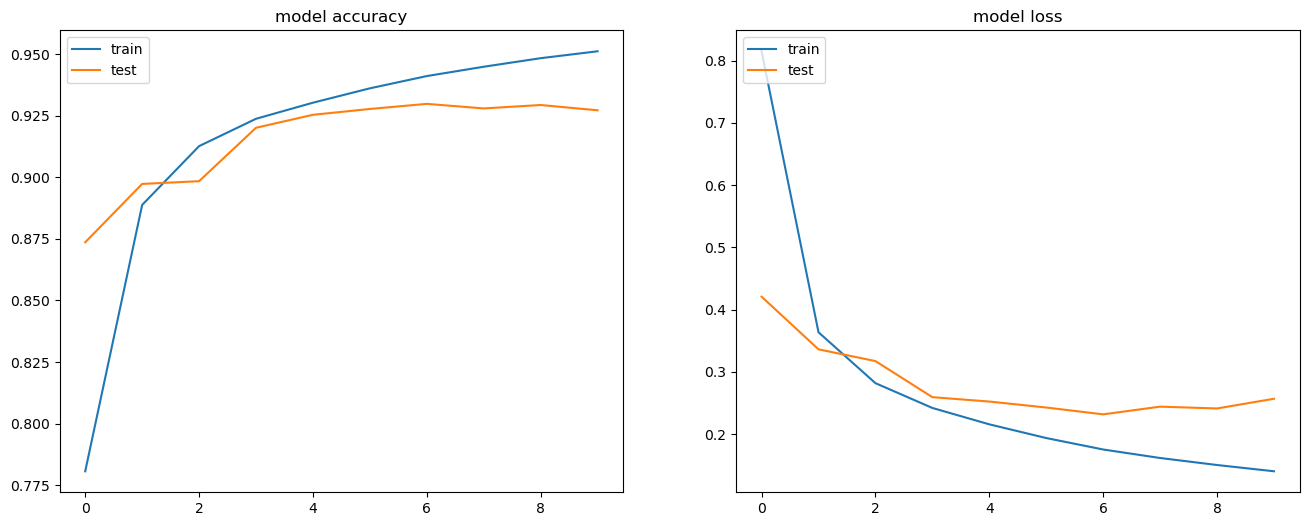

In [13]:
# Plotting
def Plott (data):
    fig, ax = plt.subplots(1,2 , figsize = (16,6))
    # Accuracy
    ax[0].plot(data.history['accuracy'])
    ax[0].plot(data.history['val_accuracy'])
    ax[0].set_title('model accuracy')
    ax[0].legend(['train', 'test'], loc='upper left')

    # Loss
    ax[1].plot(data.history['loss'], label =['loss'])
    ax[1].plot(data.history['val_loss'] ,label =['val_loss'])
    ax[1].set_title('model loss')
    ax[1].legend(['train', 'test'], loc='upper left')
    plt.show()
    
Plott(modelHistory)

### Prediction Failure Examples

In [14]:
# This code segment makes predictions on the normalized test dataset using a machine learning model, and then calculate the predicted classes and true classes by taking the indices of the highest prediction probabilities. 
# It identifies misclassified samples by comparing the predicted and true classes and extracts the corresponding predicted classes, predicted probabilities, true classes, and input samples for those misclassified samples.
ypred = mdl.predict(xtestNorm)
ypredClasses = np.argmax(ypred, axis=1)
ytrue = np.argmax(ytestEncoded, axis=1)
errors = (ypredClasses - ytrue != 0)
ypredClassesErr = ypredClasses[errors]
ypredErr = ypred[errors]
ytrueErr = ytrue[errors]
xtestErr = xtestNorm[errors]

2142/2142 [==============================] - 10s 5ms/step


In [15]:
#This code calculates the prediction probabilities Errors and true probabilities Errors for the misclassified samples in the test dataset, and then computes the difference between them. Then it sorts the indices of the samples.
ypredErrProb = np.max(ypredErr, axis=1)
trueProbErr = np.diagonal(np.take(ypredErr, ytrueErr, axis=1))
diffErrPredTrue = ypredErrProb - trueProbErr
sortIdxDiffErr = np.argsort(diffErrPredTrue)
topIdxDiffErr = sortIdxDiffErr[-2:]

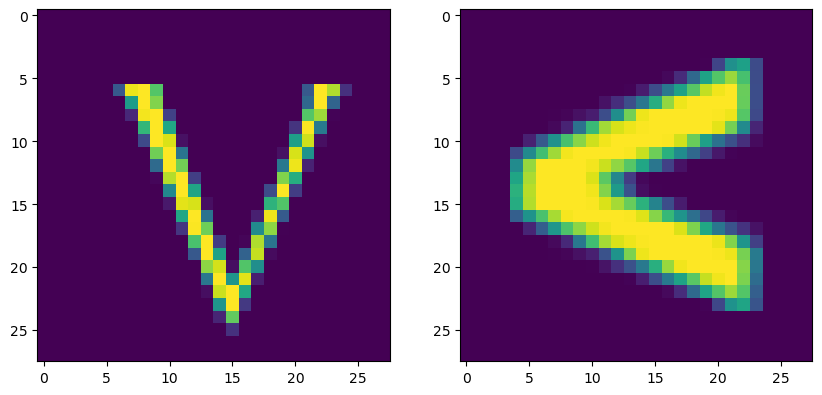

In [16]:
# This code segment creates a subplot with multiple images, each displaying a misclassified sample image.
num = len(topIdxDiffErr)
f, ax = plt.subplots(1, num, figsize=(10,10))

for i in range(0, num):
  idx = topIdxDiffErr[i]
  sample = xtestErr[idx].reshape(28,28)
  yt = ytrueErr[idx]
  yp = ypredClassesErr[idx]
  ax[i].imshow(sample, cmap='viridis')

#### The images shown above depict some examples of misclassified pictures by the model.

## Deep Neural Network (DNN)

<img src="https://github.com/Rhea3110/DSEM/blob/main/dnn.jpeg?raw=true"/>

A <b>deep neural network</b> (DNN) is a type of artificial neural network that consists of multiple hidden layers, allowing it to learn complex representations from input data. Each hidden layer in a DNN applies a transformation (linear and activation function) to its input data, extracting higher-level features and representations. The activation functions introduce non-linearity into the network, allowing it to capture complex patterns and relationships in the data. The weight and bias parameters associated with each neuron are learned during training, optimizing the network's performance.

The architecture of a DNN typically includes an input layer, one or more hidden layers, and an output layer. The input layer receives the input data, while the hidden layers perform feature extraction and representation learning. The output layer produces the final predictions or outputs of the network based on the learned representations. DNNs are widely used in various fields, including computer vision, speech recognition, natural language processing, and recommendation systems, due to their ability to learn complex patterns and representations from large amounts of data.

Feedforward and backpropagation are key concepts in training neural networks, including convolutional neural networks (CNNs), which are a type of deep learning model commonly used for image recognition and computer vision tasks.

<b>Feedforward:</b>
Feedforward is the process of passing input data through the layers of a neural network to obtain the final output or prediction. Each layer in the network performs a linear transformation followed by an activation function.

Mathematically, the feedforward process can be represented as follows for a single neuron in a neural network:

Linear transformation:
z = Wx + b
where z is the weighted sum of inputs (x) multiplied by the weights (W), and added with the bias (b).

Activation function:
a = g(z)
where a is the output of the activation function g applied to the weighted sum (z).

This process is repeated for each neuron in each layer of the network, starting from the input layer and passing through the hidden layers to the output layer, producing the final prediction or output of the network.

<b>Backpropagation:</b>
Backpropagation is the process of calculating the gradients of the loss with respect to the weights and biases in the neural network, which allows for the optimization of the model parameters during training. It involves computing the gradients of the loss with respect to the outputs of each neuron in the network, and then using these gradients to update the weights and biases in the opposite direction of the gradient.

Mathematically, the backpropagation process can be represented as follows for a single neuron in a neural network:

Gradient of the activation function:
δ = ∂L/∂z
where δ is the gradient of the loss (L) with respect to the weighted sum (z) of the neuron's inputs.

Gradient of the weights and biases:
∂L/∂W = x * δ
∂L/∂b = δ
where ∂L/∂W is the gradient of the loss with respect to the weights (W) and ∂L/∂b is the gradient of the loss with respect to the bias (b) of the neuron.

These gradients are then used to update the weights and biases in the opposite direction of the gradient using an optimization algorithm, such as stochastic gradient descent (SGD), to minimize the loss and improve the model's performance.

Note: The actual formulas for backpropagation may vary depending on the specific activation function and loss function used in the neural network. The above formulas are general representations for illustration purposes.

In [17]:
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf


In [18]:
#creating the model
mdl2 = Sequential()

mdl2.add(Flatten(input_shape=(28, 28, 1)))
mdl2.add(Dense(512))
mdl2.add(BatchNormalization())
mdl2.add(tf.keras.layers.Activation('relu'))
mdl2.add(Dropout(0.25))

mdl2.add(Dense(256))
mdl2.add(BatchNormalization())
mdl2.add(tf.keras.layers.Activation('relu'))
mdl2.add(Dropout(0.25))

mdl2.add(Dense(128))
mdl2.add(BatchNormalization())
mdl2.add(tf.keras.layers.Activation('relu'))
mdl2.add(Dropout(0.25))

mdl2.add(Dense(64))
mdl2.add(BatchNormalization())
mdl2.add(tf.keras.layers.Activation('relu'))
mdl2.add(Dropout(0.25))

mdl2.add(Dense(classes, activation='softmax'))
mdl2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 512)               401920    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                      

In [26]:
optimizer  = Adam(learning_rate=0.01)
callback =EarlyStopping(monitor='loss', patience=5)
batch_size = 64
epochs = 30
loss='categorical_crossentropy'
metrics = ['accuracy']
mdl2.compile(loss = loss, optimizer = optimizer, metrics=metrics)

In [27]:
modelHistory2= mdl2.fit(xtrainNorm, ytrainEncoded, validation_data = (xtestNorm, ytestEncoded),batch_size = batch_size ,
                   epochs = epochs, verbose = 1)

Epoch 1/30
3213/3213 [==============================] - 44s 13ms/step - loss: 0.4732 - accuracy: 0.8586 - val_loss: 0.3268 - val_accuracy: 0.8998
Epoch 2/30
3213/3213 [==============================] - 39s 12ms/step - loss: 0.4691 - accuracy: 0.8600 - val_loss: 0.3274 - val_accuracy: 0.8988
Epoch 3/30
3213/3213 [==============================] - 38s 12ms/step - loss: 0.4603 - accuracy: 0.8631 - val_loss: 0.3162 - val_accuracy: 0.9031
Epoch 4/30
3213/3213 [==============================] - 35s 11ms/step - loss: 0.4534 - accuracy: 0.8639 - val_loss: 0.3265 - val_accuracy: 0.8990
Epoch 5/30
3213/3213 [==============================] - 39s 12ms/step - loss: 0.4457 - accuracy: 0.8676 - val_loss: 0.3104 - val_accuracy: 0.9022
Epoch 6/30
3213/3213 [==============================] - 37s 11ms/step - loss: 0.4429 - accuracy: 0.8671 - val_loss: 0.3092 - val_accuracy: 0.9057
Epoch 7/30
3213/3213 [==============================] - 39s 12ms/step - loss: 0.4360 - accuracy: 0.8688 - val_loss: 0.3071 -

In [28]:
#Evaluating model accuracy on test data
score = mdl2.evaluate(xtestNorm, ytestEncoded, batch_size = batch_size,verbose = 0)
print(f"Test Accuracy:{round(score[1],4)*100}%")

Test Accuracy:91.56%


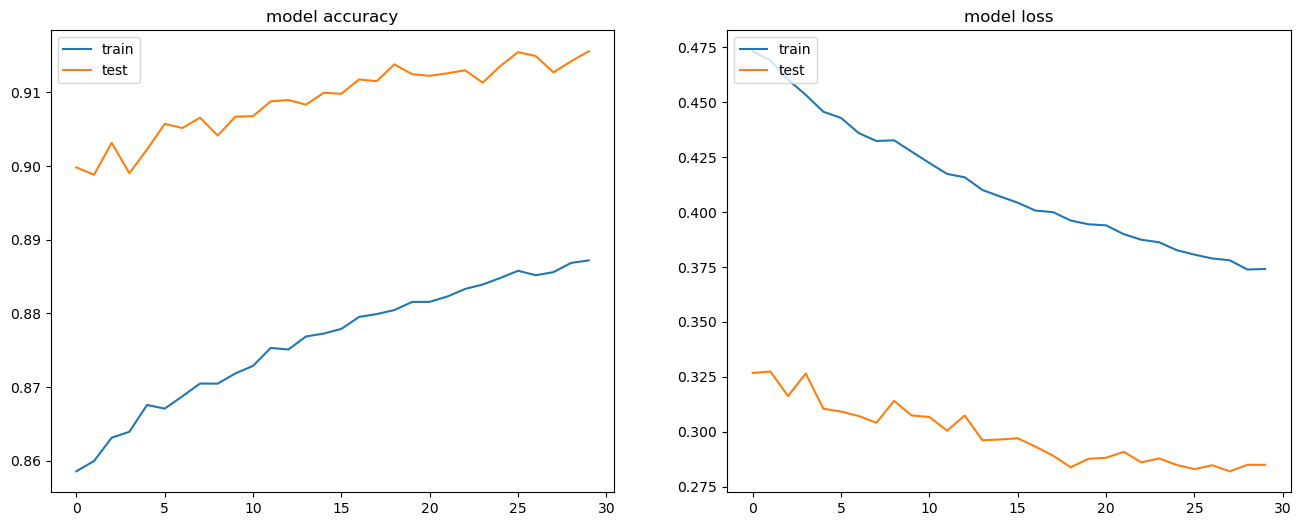

In [29]:
Plott(modelHistory2)

## CNN Vs. DNN
CNNs (Convolutional Neural Networks) are specialized for processing grid-like data like images, with convolutional and pooling layers for spatial processing.
DNNs (Deep Neural Networks) are fully connected networks, suitable for tasks with non-grid data like text or speech.
CNNs excel at local feature extraction, while DNNs focus on abstract high-level features.
CNNs use weight sharing for efficiency, while DNNs require more parameters.
CNNs can handle inputs of varying sizes, while DNNs typically require fixed-size inputs.
Training time may vary, with CNNs potentially taking longer due to their specialized architecture.
Choice between CNNs and DNNs depends on the task and data characteristics.

## Summary
The model achieved 92.16% accuracy for cnn and 91.23% accuracy for dnn (changes with every run), which is very decent for this dataset.
##### Images that the model did not predict were really hard to identify

## Conclusion 
CNNs are known to have a higher accuracy rate as compared to DNNs. This is because CNNs use convolutional layers that can learn and extract spatial hierarchies of features from the input data, which is not possible with DNNs. Convolutional layers use filters to scan the input data and capture features such as edges, corners, and shapes, which are then combined to form more complex features.

On the other hand, DNNs are made up of fully connected layers that cannot capture the spatial relationships between the input data. DNNs are better suited for tasks such as language modeling, where the input data is in sequential format, and the spatial relationships are not important.

In conclusion, CNNs are a more appropriate choice for classification tasks that involve higher dimensional arrays such as images, while DNNs are better suited for tasks such as language modeling. Moreover, CNNs generally outperform DNNs in tasks involving 2D arrays due to their ability to extract spatial hierarchies of features from the input data.

### Reference:
1. https://medium.com/@bdhuma/6-basic-things-to-know-about-convolution-daef5e1bc411
2. https://www.researchgate.net/figure/Illustration-of-Max-Pooling-and-Average-Pooling-Figure-2-above-shows-an-example-of-max_fig2_333593451
3. https://vitalflux.com/different-types-of-cnn-architectures-explained-examples/
4. https://www.bmc.com/blogs/deep-neural-network/
5. https://www.kaggle.com/nikbearbrown/code
6. "A review on deep learning techniques for image and speech recognition" (https://www.sciencedirect.com/science/article/pii/S2405452619302736)
7. "A Comprehensive Survey on Convolutional Neural Network with Backpropagation Algorithm" (https://www.sciencedirect.com/science/article/pii/S2405452620304107)
8. "Applications of Deep Learning and Convolutional Neural Networks in Natural Language Processing" (https://www.sciencedirect.com/science/article/pii/S2405452618305047)
9. "Deep Convolutional Neural Networks for Sentiment Analysis of Short Texts" (https://www.sciencedirect.com/science/article/pii/S2405452616303157)
10. "Understanding deep learning for medical image analysis" (https://www.sciencedirect.com/science/article/pii/S0939388917301480)

# Copyright 2023 Rhea Bajpai

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.